<a href="https://colab.research.google.com/github/emmeranj/test/blob/main/Bayes_by_Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Create some data to play around with

In [24]:
m = torch.distributions.uniform.Uniform(-3, 3)
noise = torch.distributions.normal.Normal(torch.tensor([0.0]), torch.tensor([0.5]))
x = m.sample([100])
y = x**2 + noise.sample([100]).squeeze(1)

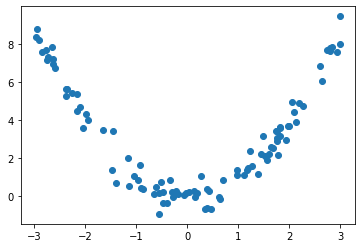

In [27]:
plt.scatter(x.numpy(), y.numpy())

# Neural Network

In [29]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


# Prior on NN weights

In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [37]:
w_dim = count_parameters(net)

In [38]:
prior = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(w_dim), torch.eye(w_dim))

# Variational Posterior

In [41]:
rho = torch.tensor([-5,2,3])

tensor([0.0067, 2.1269, 3.0486])

In [ ]:
variational_posterior = torch.distributions.multivariate_normal.MultivariateNormal(mu, torch.log(1+torch.exp(rho))*torch.eye(w_dim))

# Unbiased MC gradients 

In [66]:
def f(w, theta, x, y):
  variational_posterior = torch.distributions.multivariate_normal.MultivariateNormal(theta[0], torch.log(1+torch.exp(theta[1]))*torch.eye(w_dim))
  prior = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(w_dim), torch.eye(w_dim))
  net = Net()
  net.load_state_dict(w)
  return variational_posterior.log_prob(w) - prior.log_prob(w) - torch.distributions.multivariate_normal.MultivariateNormal(net(x.unsqueeze(1)).squeeze(1), 0.5*torch.eye(x.size()[0])).log_prob(y)

In [ ]:
def F(theta, x, y, n):
  variational_posterior = torch.distributions.multivariate_normal.MultivariateNormal(theta[0], torch.log(1+torch.exp(theta[1]))*torch.eye(w_dim))
  ELBO = 0
  for i in range(n):
    w = variational_posterior.sample()
    # need to modify here so that w is in right format...
    ELBO += f(w, theta, x, y)
  return(ELBO)

# How to format w in f above

In [67]:
net1 = Net()
net2 = Net()

In [77]:
net1.parameters() == sd = net1.state_dict()
net2.load_state_dict(sd)net2.parameters()

False

In [79]:
for p in net1.parameters():
  print(p[0])

tensor([0.3923], grad_fn=<SelectBackward>)
tensor(0.9855, grad_fn=<SelectBackward>)
tensor([ 0.1182,  0.2397,  0.1912, -0.1782, -0.2465, -0.0044, -0.1545,  0.0541,
        -0.0403,  0.1524,  0.0251, -0.2313,  0.1256, -0.1033,  0.1563,  0.0043],
       grad_fn=<SelectBackward>)
tensor(0.0255, grad_fn=<SelectBackward>)
tensor([ 0.1889, -0.1914,  0.0198, -0.0099,  0.0447, -0.1921, -0.1284,  0.0099,
        -0.2386,  0.1398, -0.1031,  0.0233, -0.1789, -0.0380, -0.1616,  0.1988],
       grad_fn=<SelectBackward>)
tensor(0.0029, grad_fn=<SelectBackward>)


In [80]:
for p in net2.parameters():
  print(p[0])

tensor([0.3923], grad_fn=<SelectBackward>)
tensor(0.9855, grad_fn=<SelectBackward>)
tensor([ 0.1182,  0.2397,  0.1912, -0.1782, -0.2465, -0.0044, -0.1545,  0.0541,
        -0.0403,  0.1524,  0.0251, -0.2313,  0.1256, -0.1033,  0.1563,  0.0043],
       grad_fn=<SelectBackward>)
tensor(0.0255, grad_fn=<SelectBackward>)
tensor([ 0.1889, -0.1914,  0.0198, -0.0099,  0.0447, -0.1921, -0.1284,  0.0099,
        -0.2386,  0.1398, -0.1031,  0.0233, -0.1789, -0.0380, -0.1616,  0.1988],
       grad_fn=<SelectBackward>)
tensor(0.0029, grad_fn=<SelectBackward>)
